In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Dataset.zip to Dataset.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("Dataset.zip", "r") as zip_ref:
    zip_ref.extractall("/content/")

print(os.listdir("/content/Dataset"))


['Train', 'Test']


In [ ]:
IMAGE_SIZE = [224, 224]

### Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
folders = glob('/content/Dataset/Train/*')
print(folders)
print("Number of classes:", len(folders))

['/content/Dataset/Train/Parasite', '/content/Dataset/Train/Uninfected']
Number of classes: 2


In [ ]:
folders

['/content/Dataset/Train/Parasite', '/content/Dataset/Train/Uninfected']

In [ ]:
from keras.layers import Flatten, Dense

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)



In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

### Create Model from scratch using CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
train_dir = '/content/drive/My Drive/MalariaCellDetection/train_data'
test_dir = '/content/drive/My Drive/MalariaCellDetection/test_data'




print("Train folder contents:", os.listdir(train_dir))
print("Test folder contents:", os.listdir(test_dir))

Train folder contents: ['Parasite', 'Uninfected ']
Test folder contents: ['Parasite', 'Uninfected ']


In [ ]:
for folder in os.listdir(train_dir):
    path = os.path.join(train_dir, folder)
    print(f"Train/{folder} contains {len(os.listdir(path))} images")

for folder in os.listdir(test_dir):
    path = os.path.join(test_dir, folder)
    print(f"Test/{folder} contains {len(os.listdir(path))} images")

Train/Parasite contains 800 images
Train/Uninfected  contains 800 images
Test/Parasite contains 200 images
Test/Uninfected  contains 200 images


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),

    # 👇 Last layer must have number of classes = 2 (Parasitized, Uninfected)
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 469s 9s/step - accuracy: 0.5438 - loss: 3.0093 - val_accuracy: 0.6475 - val_loss: 0.6552
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 514ms/step - accuracy: 0.6010 - loss: 0.6623 - val_accuracy: 0.6625 - val_loss: 0.6317
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 509ms/step - accuracy: 0.6906 - loss: 0.6148 - val_accuracy: 0.7450 - val_loss: 0.5889
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 508ms/step - accuracy: 0.7325 - loss: 0.5738 - val_accuracy: 0.7325 - val_loss: 0.5186
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 501ms/step - accuracy: 0.7812 - loss: 0.4983 - val_accuracy: 0.8075 - val_loss: 0.4298


In [ ]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_set)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.8353 - loss: 0.3965
Test Accuracy: 80.75%
Test Loss: 0.4298


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step


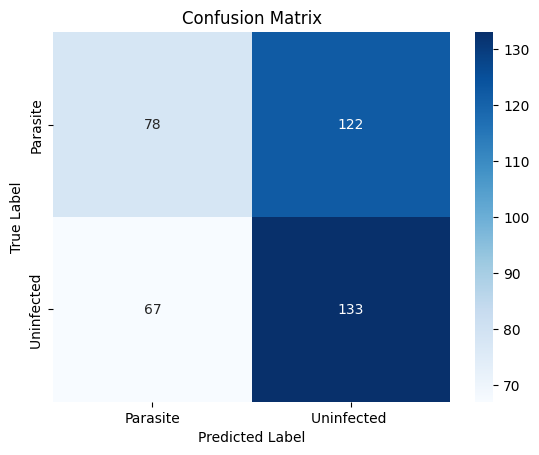

Classification Report:

              precision    recall  f1-score   support

    Parasite       0.54      0.39      0.45       200
 Uninfected        0.52      0.67      0.58       200

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.52       400
weighted avg       0.53      0.53      0.52       400



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_set.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_set.class_indices.keys()),
            yticklabels=list(test_set.class_indices.keys()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report (Precision, Recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=list(test_set.class_indices.keys())))
